In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/car data.csv")
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
pair_df = [data[["Year", "Present_Price", "Kms_Driven", "Owner"]], 
           pd.get_dummies(data[["Fuel_Type", "Seller_Type", "Transmission"]], drop_first=True), data[["Selling_Price"]]]
X = pd.concat(pair_df, axis=1)
y = data[["Selling_Price"]]

In [ ]:
X.head(10)

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
5,2018,9.83,2071,0,1,0,0,1
6,2015,8.12,18796,0,0,1,0,1
7,2015,8.61,33429,0,1,0,0,1
8,2016,8.89,20273,0,1,0,0,1
9,2015,8.92,42367,0,1,0,0,1


In [ ]:
y.head(10)

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


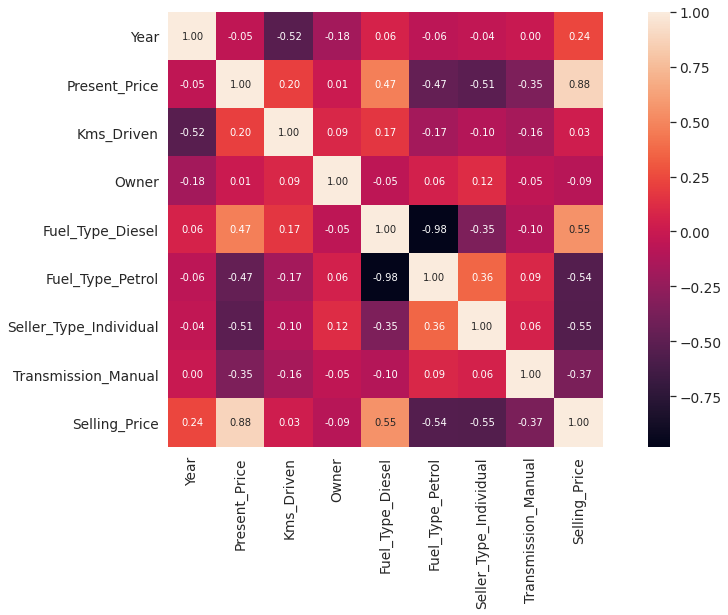

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
corrmat = X.corr()
# picking the top 10 correlated features
cols = corrmat.index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
X.drop(labels=["Selling_Price"], axis=1, inplace=True)

In [ ]:
X.head(10)

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
5,2018,9.83,2071,0,1,0,0,1
6,2015,8.12,18796,0,0,1,0,1
7,2015,8.61,33429,0,1,0,0,1
8,2016,8.89,20273,0,1,0,0,1
9,2015,8.92,42367,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 8), (91, 8), (210, 1), (91, 1))

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_train, y_pred=linreg.predict(X_train))

3.5086397156178335

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_train, y_pred=linreg.predict(X_train))

1.2365934633142046

In [ ]:
linreg.score(X_train, y_train)

0.8743265705350028

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train, y_pred=linreg.predict(X_train))

0.8743265705350028

In [ ]:
mse = mean_squared_error(y_true=y_test, y_pred=linreg.predict(X_test))
mae = mean_absolute_error(y_true=y_test, y_pred=linreg.predict(X_test))
r2 = linreg.score(X_test, y_test)

print("MSE on test data: ", mse)
print("MAE on test data: ", mae)
print("R squared on test data: ", r2)

MSE on test data:  1.9590742803504748
MAE on test data:  1.1034611782410868
R squared on test data:  0.9055524394709031


In [ ]:
X.head(10)

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
5,2018,9.83,2071,0,1,0,0,1
6,2015,8.12,18796,0,0,1,0,1
7,2015,8.61,33429,0,1,0,0,1
8,2016,8.89,20273,0,1,0,0,1
9,2015,8.92,42367,0,1,0,0,1


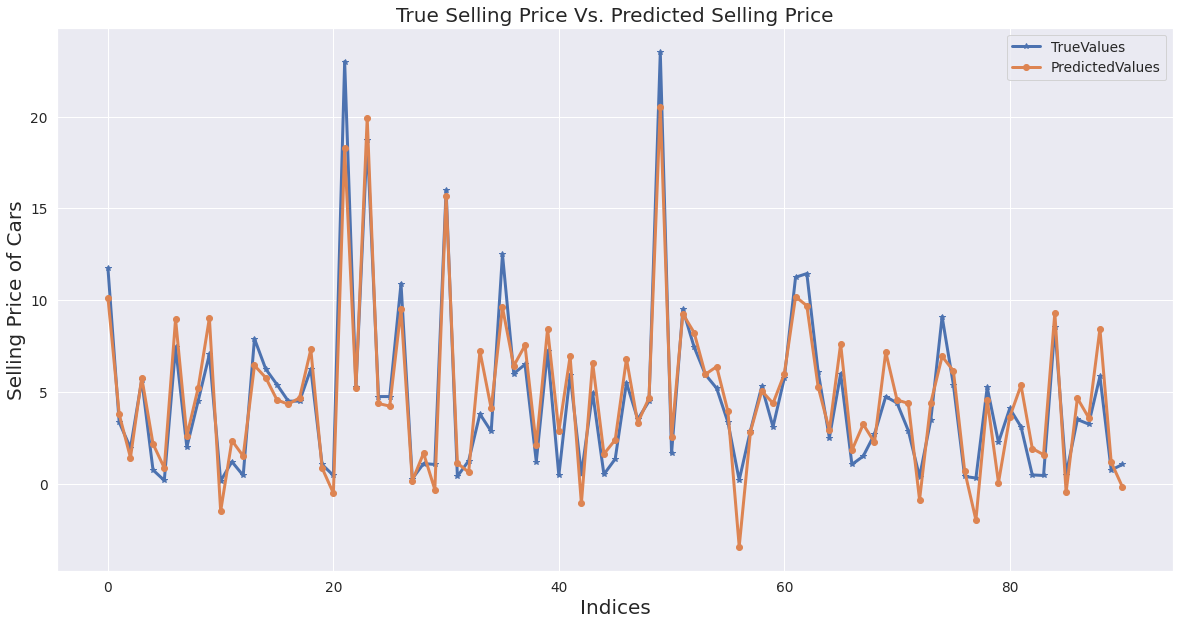

In [ ]:
# For Test data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), linreg.predict(X_test), label="PredictedValues", marker="o", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.legend()
plt.show()

In [ ]:
from sklearn import tree
de=tree.DecisionTreeRegressor()
de.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
mse = mean_squared_error(y_true=y_test, y_pred=de.predict(X_test))
mae = mean_absolute_error(y_true=y_test, y_pred=de.predict(X_test))
r2 = de.score(X_test, y_test)

print("MSE on test data: ", mse)
print("MAE on test data: ", mae)
print("R squared on test data: ", r2)

MSE on test data:  0.9373945054945055
MAE on test data:  0.631978021978022
R squared on test data:  0.9548079288338692


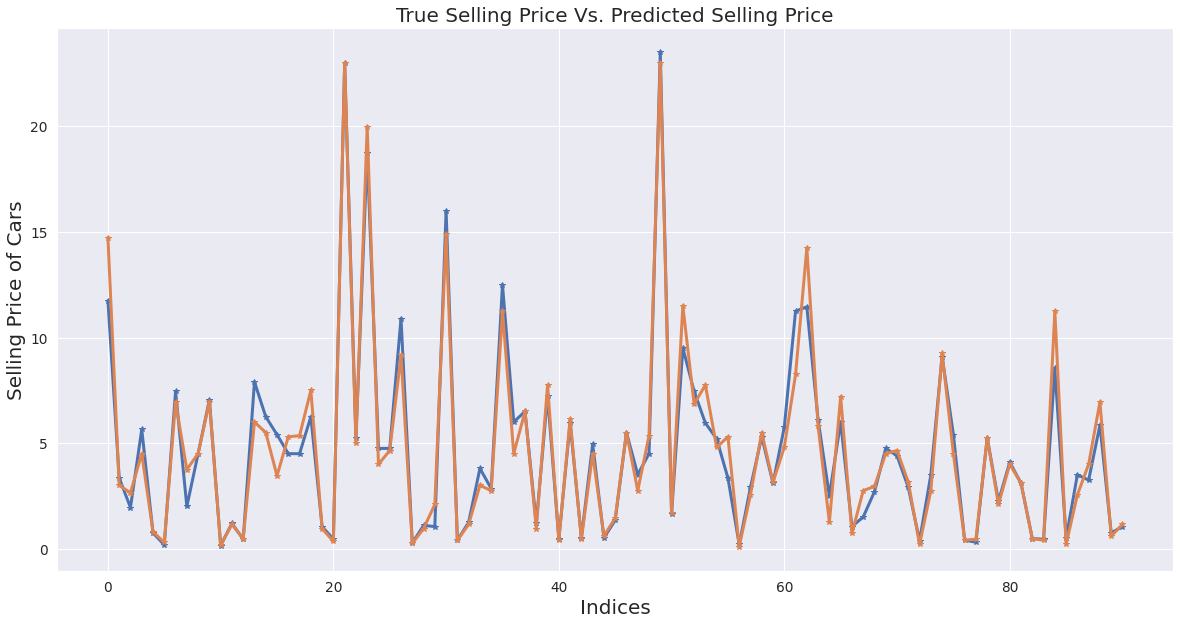

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# For training data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), de.predict(X_test), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.show()